In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm           
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('datos.csv')
df

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
0,8450,7,5,19,19,4,3,3,2,0,208500,0
1,9600,6,8,46,46,3,3,3,2,0,181500,0
2,11250,7,5,21,20,4,3,3,2,0,223500,0
3,9550,7,5,107,52,3,3,3,3,0,140000,0
4,14260,8,5,22,22,4,3,4,3,0,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,23,22,3,3,3,2,0,175000,0
1456,13175,6,6,44,34,3,3,3,2,0,210000,0
1457,9042,7,9,81,16,5,4,4,1,0,266500,0
1458,9717,5,6,72,26,3,3,2,1,0,142125,0


In [ ]:
df.drop(columns =['OverallCond','YearRemodAdd','PoolArea', 'ExterQual'], inplace = True)

In [ ]:
df

,LotArea,OverallQual,YearBuilt,ExterCond,BedroomAbvGr,GarageCars,SalePrice,Artery
0,8450,7,19,3,3,2,208500,0
1,9600,6,46,3,3,2,181500,0
2,11250,7,21,3,3,2,223500,0
3,9550,7,107,3,3,3,140000,0
4,14260,8,22,3,4,3,250000,0
...,...,...,...,...,...,...,...,...
1455,7917,6,23,3,3,2,175000,0
1456,13175,6,44,3,3,2,210000,0
1457,9042,7,81,4,4,1,266500,0
1458,9717,5,72,3,2,1,142125,0


In [ ]:
df.describe()

,LotArea,OverallQual,YearBuilt,ExterCond,BedroomAbvGr,GarageCars,SalePrice,Artery
count,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.00000,1391.000000,1391.000000
mean,9272.537024,6.091301,50.442128,3.079799,2.859094,1.74982,178136.292595,0.031632
std,3196.732418,1.371709,30.301757,0.347801,0.805727,0.74955,75793.167741,0.175081
min,1491.000000,1.000000,12.000000,1.000000,0.000000,0.00000,34900.000000,0.000000
25%,7429.000000,5.000000,21.000000,3.000000,2.000000,1.00000,129000.000000,0.000000
50%,9286.000000,6.000000,48.000000,3.000000,3.000000,2.00000,160000.000000,0.000000
75%,11231.500000,7.000000,68.000000,3.000000,3.000000,2.00000,210000.000000,0.000000
max,17671.000000,10.000000,150.000000,5.000000,8.000000,4.00000,745000.000000,1.000000


In [ ]:
q_1 = df['LotArea'].quantile(.25)
q_3 = df['LotArea'].quantile(.75)
iqr = q_3 - q_1
lim_inf = q_1 - iqr*1.5
lim_sup = q_3 + iqr*1.5

In [ ]:
df = df[(df['LotArea']>=lim_inf) & (df['LotArea']<=lim_sup)]

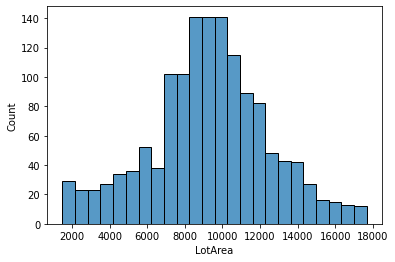

In [ ]:
sns.histplot(data = df, x = 'LotArea')

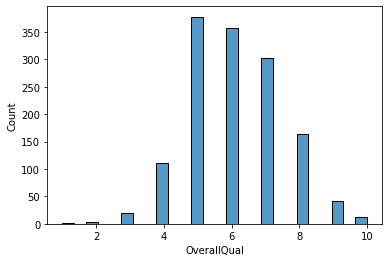

In [ ]:
sns.histplot(data = df, x = 'OverallQual')

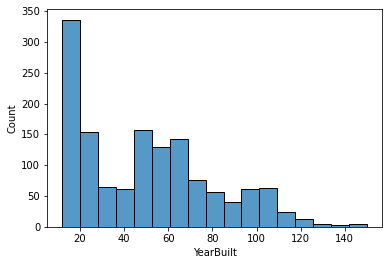

In [ ]:
sns.histplot(data = df, x = 'YearBuilt')

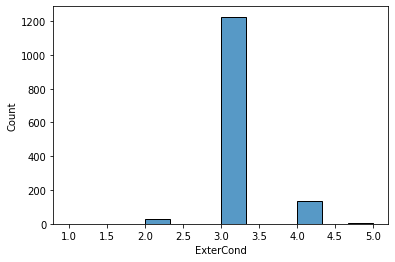

In [ ]:
sns.histplot(data = df, x = 'ExterCond')

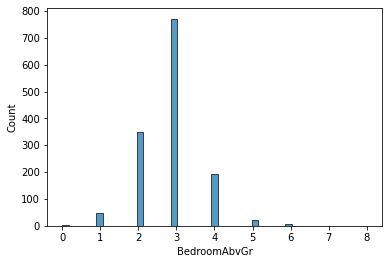

In [ ]:
sns.histplot(data = df, x = 'BedroomAbvGr')

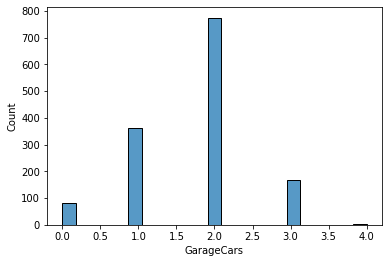

In [ ]:
sns.histplot(data = df, x = 'GarageCars')

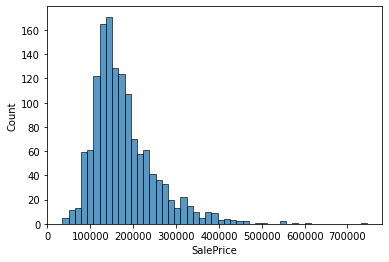

In [ ]:
sns.histplot(data = df, x = 'SalePrice')

In [ ]:
y = df['SalePrice']
x = df[['LotArea','OverallQual','YearBuilt','ExterCond','BedroomAbvGr','GarageCars','Artery']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
reg= model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     569.6
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:25:14   Log-Likelihood:                -16659.
No. Observations:                1391   AIC:                         3.333e+04
Df Residuals:                    1383   BIC:                         3.338e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.905e+04   1.16e+04     -8.560      0.000   -1.22e+05   -7.63e+04
LotArea          5.1379      0.357     14.394      0.000       4.438       5.838
OverallQual   3.252e+04   1043.350     31.172      0.000    3.05e+04    3.46e+04
YearBuilt     -230.7434     46.676     -4.944      0.000    -322.306    -139.181
ExterCond     1733.7254   3001.794      0.578      0.564   -4154.835    7622.286
BedroomAbvGr  2747.8650   1364.194      2.014      0.044      71.753    5423.977
GarageCars    1.737e+04   1892.072      9.183      0.000    1.37e+04    2.11e+04
Artery       -1.654e+04   6091.592     -2.716      0.007   -2.85e+04   -4594.574
==============================================================================
Omnibus:                      679.500   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9242.600
Skew:                           1.923   Prob(JB):                         0.00
Kurtosis:                      15.028   Cond. No.                     1.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Significa que entre más cerca esté la vivienda de la arteria principal, el precio de esta cae en 16.544 dólares
reg.params['Artery']

-0.10866731351887227

In [ ]:
y = (df['SalePrice']
x = df[['LotArea','OverallQual','YearBuilt','ExterCond','BedroomAbvGr','GarageCars','Artery']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
reg= model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     799.1
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:26:56   Log-Likelihood:                 449.44
No. Observations:                1391   AIC:                            -882.9
Df Residuals:                    1383   BIC:                            -841.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.4537      0.053    198.316      0.000      10.350      10.557
LotArea       2.396e-05   1.63e-06     14.733      0.000    2.08e-05    2.71e-05
OverallQual      0.1594      0.005     33.534      0.000       0.150       0.169
YearBuilt       -0.0022      0.000    -10.148      0.000      -0.003      -0.002
ExterCond        0.0599      0.014      4.379      0.000       0.033       0.087
BedroomAbvGr     0.0425      0.006      6.836      0.000       0.030       0.055
GarageCars       0.0978      0.009     11.344      0.000       0.081       0.115
Artery          -0.1087      0.028     -3.916      0.000      -0.163      -0.054
==============================================================================
Omnibus:                      124.307   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              395.858
Skew:                          -0.427   Prob(JB):                     1.10e-86
Kurtosis:                       5.470   Cond. No.                     1.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#El resultado significa que al pasar la arteria, el precio de la vivienda cae en un 10%
reg.params['Artery']

-0.10866731351887227